# Coulomb logarithms

[impact parameter]: https://en.wikipedia.org/wiki/Impact_parameter

[Coulomb collisions](https://en.wikipedia.org/wiki/Coulomb_collision) are collisions between two charged particles where the interaction is governed solely by the electric fields from the two particles. Coulomb collisions usually result in small deflections of particle trajectories. The deflection angle depends on the [impact parameter] of the collision, which is the perpendicular distance between the particle's trajectory and the particle it is colliding with.  High impact parameter collisions (which result in small deflection angles) occur much more frequently than low impact parameter collisions (which result in large deflection angles).

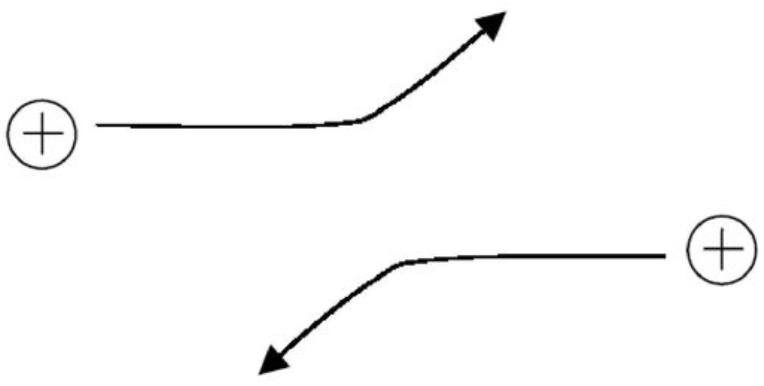

[Debye length]: https://en.wikipedia.org/wiki/Debye_length
[reduced mass]: https://en.wikipedia.org/wiki/Reduced_mass
[de Broglie wavelength]: https://en.wikipedia.org/wiki/Matter_wave

[Debye_length()]: ../../api/plasmapy.formulary.lengths.Debye_length.rst#debye-length
[impact_parameter_perp()]: ../../api/plasmapy.formulary.collisions.lengths.impact_parameter_perp.rst#impact-parameter-perp
[impact_parameter()]: ../../api/plasmapy.formulary.collisions.lengths.impact_parameter.rst#impact-parameter
[plasmapy.formulary]: ../../formulary/index.rst


The minimum and maximum impact parameters ($b_\min$ and $b_\max$, respectively) represent the range of distances of closest approach. While a typical Coulomb collision results in only a slight change in trajectory, the effects of these collisions are cumulative, and it is necessary to integrate over the range of impact parameters to account for the effects of Coulomb collisions throughout the plasma. The Coulomb logarithm accounts for the range in impact parameters for the different collisions, and is given by 
$$\ln{Λ} ≡ \ln\left(\frac{b_\max}{b_\min}\right).$$

But what should we use for the impact parameters?

Usually $b_\max$ is given by the [Debye length], 
$$λ_D = \sqrt{\frac{\epsilon_0 kT_e}{n_eq_e^2}}$$, 
which can be calculated with [Debye_length()]. On length scales $≳ λ_D$, electric fields from individual particles get cancelled out due to screening effects. Consequently, Coulomb collisions with impact parameters $≳ λ_D$ will rarely occur. 

The inner impact parameter $b_\min$ requires more nuance. One possibility would be to set $b_\min$ to be the impact parameter corresponding to a 90° deflection angle, $ρ_⟂$, which can be calculated with [impact_parameter_perp()].  Alternatively, $b_\min$ could be set to be the [de Broglie wavelength], $λ_{dB} = h/\mu v$, calculated using the [reduced mass], $μ$, of the particles. Typically, we choose whichever value is larger, $$b_\min = \max\left\{ρ_⟂, λ_{dB} \right\}.$$ The code will do this for you.

The [impact_parameter()] function in [plasmapy.formulary] simultaneously calculates both $b_\min$ and $b_\max$. Let's estimate $b_\min$ and $b_\max$ for proton-electron collisions in the solar corona.

In [2]:
%matplotlib inline
%config InlineBackend.figure_formats = ['svg']

import astropy.units as u
import matplotlib.pyplot as plt
import numpy as np
from astropy.constants import hbar as ℏ
from astropy.visualization import quantity_support

from plasmapy.formulary.collisions import (
    Coulomb_logarithm,
    impact_parameter,
    impact_parameter_perp,
)
from plasmapy.formulary.speeds import thermal_speed
from plasmapy.particles import reduced_mass

In [3]:
solar_corona = {
    "T": 1e6 * u.K,
    "n_e": 1e15 * u.m**-3,
    "species": ["e-", "p+"],
}

bmin, bmax = impact_parameter(**solar_corona)

print(f"{bmin = :.2e}")
print(f"{bmax = :.2e}")

bmin = 1.05e-11 m
bmax = 2.18e-03 m


When we calculate the Coulomb logarithm, we find that it is ∼20 (a common value for astrophysical plasma).

In [4]:
Coulomb_logarithm(**solar_corona) #Specifies the list 'solar_corona' as the function's input

19.150697742645406

[Quantity]: https://docs.astropy.org/en/stable/api/astropy.units.Quantity.html#astropy.units.Quantity
[quantity_support]: https://docs.astropy.org/en/stable/api/astropy.visualization.quantity_support.html

Our next goals are to visualize the Coulomb logarithm and impact parameters for different physical conditions.  Let's start by creating a function to plot $\ln{Λ}$ against temperature.  We will use [quantity_support] to enable plotting with [Quantity] objects. Change the cell below from Markdown to Code and fill in the necessary parts, specified in ALL CAPS.

def plot_coulomb(T, n_e, species, **kwargs):
    """Plot the Coulomb logarithm and impact parameter length scales."""

    ln_Λ = CALL THE COULOMB FUNCTION

    with quantity_support():
        fig, ax = plt.subplots()

        fig.set_size_inches(4, 4)

        ax.semilogx(T, ln_Λ)

        LABEL THE X AXIS
        LABEL THE Y AXIS
        CREATE A TITLE FOR YOUR PLOT

        fig.tight_layout()

Next we will create a function to plot $b_\min$ and $b_\max$ as functions of temperature, along with the $ρ_⟂$ and $λ_{dB}$.

def plot_impact_parameters(T, n_e, species, **kwargs):
    """Plot the minimum & maximum impact parameters for Coulomb collisions."""

    bmin, bmax = CALL THE IMPACT_PARAMETER FUNCTION

    μ = reduced_mass(*species)
    V_the = thermal_speed(T, "e-")
    λ_dB = ℏ / (2 * μ * V_the)

    ρ_perp = CALL THE IMPACT_PARAMETER_PERP FUNCTION

    with quantity_support():
        fig, ax = plt.subplots()
        fig.set_size_inches(4, 4)

        ax.loglog(T, λ_dB, "--", label=r"$λ_\mathrm{dB}$")
        ax.loglog(T, ρ_perp, "-.", label=r"$ρ_\perp$")
        ax.loglog(T, bmin, "-", label=r"$b_\mathrm{min}$")
        ax.loglog(T, bmax, "-", label=r"$b_\mathrm{max}$")

        LABEL THE X AXIS
        LABEL THE Y AXIS
        CREATE A TITLE FOR THE PLOT
        CREATE A LEGEND

        fig.tight_layout()

Let's now plot the Coulomb logarithm and minimum/maximum impact parameters over a range of temperatures in a dense plasma.

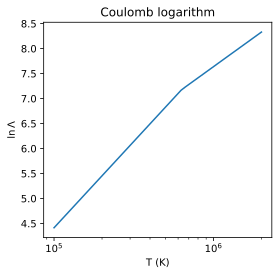

In [15]:
n_e = 1e25 * u.m**-3

dense_plasma = {
    "T": np.geomspace(1e5, 2e6) * u.K,
    "n_e": n_e,
    "species": ["e-", "p+"],
}

plot_coulomb(**dense_plasma)

To investigate what is happening at the sudden change in slope, let's plot the impact parameters against temperature.

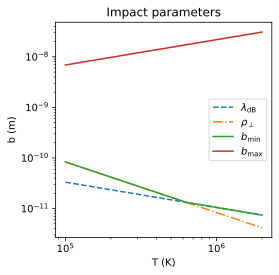

In [16]:
plot_impact_parameters(**dense_plasma)

At low temperatures, $b_\min$ is $ρ_⟂$. At higher temperatures, $b_\min$ is $λ_{dB}$. What happens if we look at lower temperatures?

/Users/mmm8543/myenv/lib/python3.12/site-packages/plasmapy/formulary/collisions/coulomb.py:473: CouplingWarning: The calculation of the Coulomb logarithm has found a value of min(ln Λ) = -5.9477 which is likely to be inaccurate due to strong coupling effects, in particular because method = 'classical' assumes weak coupling.
  warnings.warn(


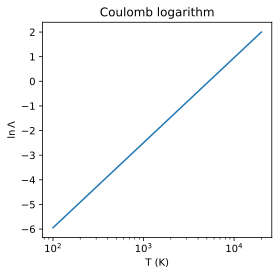

In [17]:
cool_dense_plasma = {
    "T": np.geomspace(1e2, 2e4) * u.K,
    "n_e": n_e,
    "species": ["e-", "p+"],
}

plot_coulomb(**cool_dense_plasma)

The Coulomb logarithm becomes negative! 🙀 Let's look at the impact parameters again to understand what's happening.

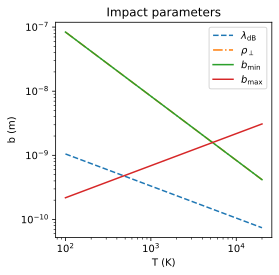

In [18]:
plot_impact_parameters(**cool_dense_plasma)

 This unphysical situation occurs because $b_\min > b_\max$ at low temperatures.

[Gericke, Murillo, and Schlanges (2002)]: https://doi.org/10.1103/PhysRevE.65.036418

[Coulomb_logarithm()]: ../../api/plasmapy.formulary.collisions.coulomb.Coulomb_logarithm.rst#coulomb-logarithm

So how should we handle this?  Fortunately, PlasmaPy's implementation of [Coulomb_logarithm()] includes the methods described by [Gericke, Murillo, and Schlanges (2002)] for dense, strongly-coupled plasmas.  For most cases, we recommend using `method="hls_full_interp"` in which $b_\min$ is interpolated between $λ_{dB}$ and $ρ_⟂$, and $b_\max$ is interpolated between $λ_D$ and the ion sphere radius, $a_i ≡ \left(\frac{3}{4} π n_i\right)^{⅓}$.

/Users/mmm8543/myenv/lib/python3.12/site-packages/plasmapy/formulary/collisions/coulomb.py:481: CouplingWarning: The calculation of the Coulomb logarithm has found a value of min(ln Λ) = 0.0006. Coulomb logarithms of ≲ 4 may have increased uncertainty due to strong coupling effects.
  warnings.warn(


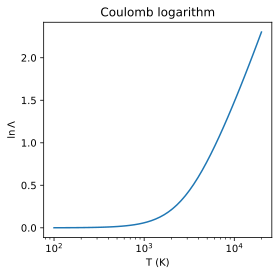

In [19]:
cool_dense_plasma["z_mean"] = 1
cool_dense_plasma["method"] = "hls_full_interp"

plot_coulomb(**cool_dense_plasma)

The Coulomb logarithm approaches zero as the temperature decreases, and does not become unphysically negative. This is the expected behavior, although there is increased uncertainty for Coulomb logarithms $≲4$.
